This script is used to evaluate the 104 sequences of the original UniProt that are too short in length (blue border), and the 21 sequences belonging to our selection of referenced sequences (red border). Then used for `2-ref-org-acc-graph.ipynb` visualization.

In [1]:
import os
from os.path import join
import pandas as pd
CURRENT_DIR = os.getcwd()
print(CURRENT_DIR)

d:\Python\aox\enzyme-mining-aox


In [2]:
DATADIR = os.path.join(CURRENT_DIR, "data", "aox")
CURATEDIR = os.path.join(DATADIR, "graph", "ref_org_acc", "curate")

filenames = {
    # download or curate from the database website
    "uniprot_sequence": join(DATADIR, "raw", "uniprot_sequence.tsv"),
    "sequence_fasta": join(DATADIR, "raw", "sequence.fasta"),

    # results
    "sequence": join(CURATEDIR, "sequences.tsv"),
}

In [3]:
uniprot_sequence = pd.read_csv(filenames['uniprot_sequence'], sep='\t')
uniprot_sequence = uniprot_sequence[['Entry', 'Length', 'Sequence', 'Reviewed']]
uniprot_sequence = uniprot_sequence.rename(columns={
    'Entry': 'uniprot id',
    'Length': 'length',
    'Sequence': 'sequence',
    'Reviewed': 'reviewed'
})

### analysis

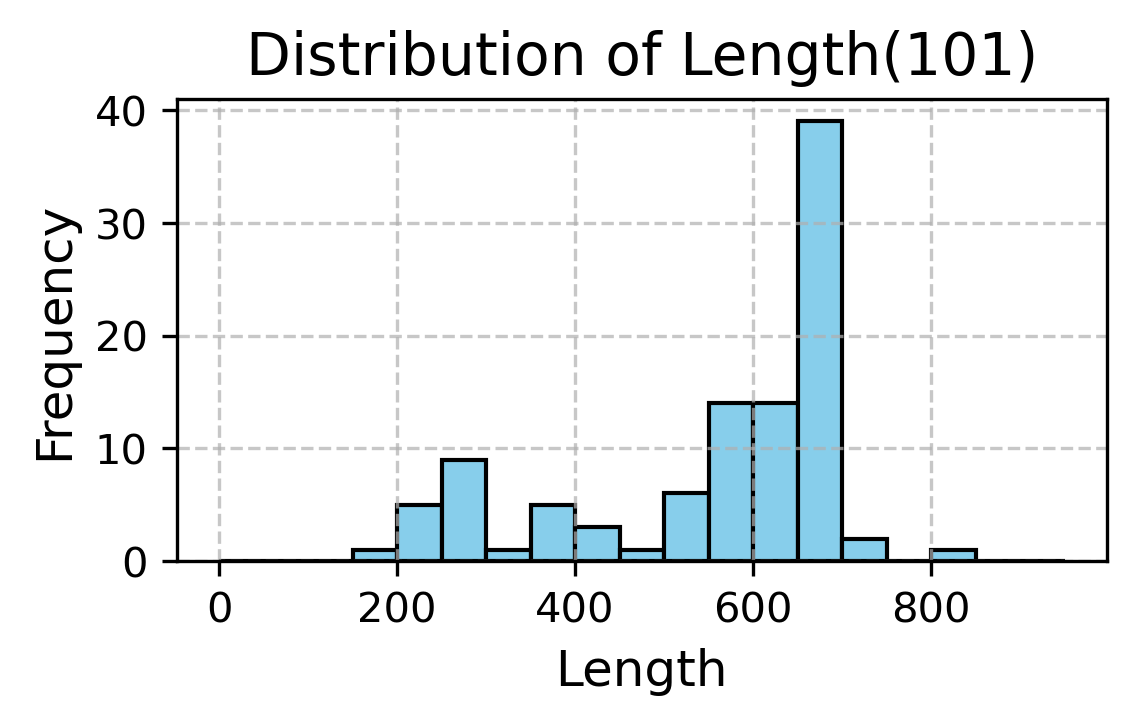

In [12]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(4, 2), dpi=300)

plt.hist(uniprot_sequence['length'], bins=range(0, 1000, 50), color='skyblue', edgecolor='black')
plt.title(f"Distribution of Length({sum(uniprot_sequence['length'] < 1000)})", fontsize=14)
plt.xlabel('Length', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# 104 = 101 + 3 (other 3 sequences length longer than 1000)

In [5]:
uniprot_sequence[uniprot_sequence['reviewed'] == 'reviewed'] # 6

,uniprot id,length,sequence,reviewed
0,P04842,663,MAIPEEFDILVLGGGSSGSCIAGRLANLDHSLKVGLIEAGENNLNN...,reviewed
1,F2QY27,663,MAIPEEFDILVLGGGSSGSCIAGRLANLDHSLKVGLIEAGENNLNN...,reviewed
2,F2R038,663,MAIPEEFDILVLGGGSSGSCIAGRLANLDHSLKVGLIEAGENNLNN...,reviewed
3,P04841,664,MAIPDEFDIIVVGGGSTGCCIAGRLANLDDQNLTVALIEGGENNIN...,reviewed
4,Q00922,663,MAIPEEFDVIVCGGGSTGCVIAGRLANVDENLKVLLIENGENNLNN...,reviewed
5,C4R702,663,MAIPEEFDILVLGGGSSGSCIAGRLANLDHSLKVGLIEAGENNLNN...,reviewed


In [6]:
from Bio import SeqIO

seqs = []
for seqrecord in SeqIO.parse(filenames['sequence_fasta'], "fasta"):
    seqs.append([seqrecord.id, str(seqrecord.seq)])
ncbi_sequences = pd.DataFrame(seqs, columns=['ncbi id', 'sequence'])
set_ncbi_sequences = set(ncbi_sequences['sequence'])

uniprot_sequence[uniprot_sequence['sequence'].isin(set_ncbi_sequences)] # 16

,uniprot id,length,sequence,reviewed
1,F2QY27,663,MAIPEEFDILVLGGGSSGSCIAGRLANLDHSLKVGLIEAGENNLNN...,reviewed
8,A0A067YIW8,663,MAIPDEFDIIVVGGGSTGCCIAGRLGNLDPNVTVALIEGGENNLNN...,unreviewed
15,A0A1B2JII2,663,MAIPEEFDILVLGGGSSGSCIAGRLANLDHSLKVGLIEAGENNLNN...,unreviewed
38,A0A977TIR6,653,MGHPEEVDVIVCGGGPAGCVVAGRLAYADPTLKVMLIEGGANNRDD...,unreviewed
42,A6PZG7,664,MAIPDEFDIIVVGGGSTGCCIAGRLANLDDQNLTVALIEGGENNIN...,unreviewed
43,A6PZG8,664,MAIPDEFDIIVVGGGSTGCCVAGRLANLDDQNLTVALIEGGENNVN...,unreviewed
44,A6PZG9,664,MAIPDEFDIIVVGGGSTGCCVAGRLANLDDQNLTVALIEGGENNIN...,unreviewed
54,Q5S057,653,MAIPEEFDVIVCGGGSTGCVIAGRLANVDENLKVLLIENGENNLNN...,unreviewed
55,Q5S058,663,MAIPEEFDVIVCGGGSTGCVIAGRLANVDENLKVLLIENGENNLNN...,unreviewed
56,Q5S059,664,MAIPDEFDIIVVGGGSTGCALAGRLGNLDENLTVALIEGGENNINN...,unreviewed


### annotate

In [7]:
_type = []
for i, row in uniprot_sequence.iterrows():
    i_type = 4
    if 600 <= row['length'] <= 700:
        i_type = 3
    if row['reviewed'] == 'reviewed':
        i_type = 2
    if row['sequence'] in set_ncbi_sequences:
        i_type = 1
    _type.append(i_type)
uniprot_sequence['type'] = _type
uniprot_sequence

,uniprot id,length,sequence,reviewed,type
0,P04842,663,MAIPEEFDILVLGGGSSGSCIAGRLANLDHSLKVGLIEAGENNLNN...,reviewed,2
1,F2QY27,663,MAIPEEFDILVLGGGSSGSCIAGRLANLDHSLKVGLIEAGENNLNN...,reviewed,1
2,F2R038,663,MAIPEEFDILVLGGGSSGSCIAGRLANLDHSLKVGLIEAGENNLNN...,reviewed,2
3,P04841,664,MAIPDEFDIIVVGGGSTGCCIAGRLANLDDQNLTVALIEGGENNIN...,reviewed,2
4,Q00922,663,MAIPEEFDVIVCGGGSTGCVIAGRLANVDENLKVLLIENGENNLNN...,reviewed,2
...,...,...,...,...,...
99,M5CAV1,592,MHNRFYLSPLACVTAGRLAKSNPELNILIVEQGPNNYQEPSVVTPA...,unreviewed,4
100,M5CB66,437,MSQIQSEFDIIFVGGGTTACVAAGRLAKSNPELNILIVEQGSNNYQ...,unreviewed,4
101,M5CC52,403,MSQIQSEFDIIFVGGGTTACVAAGRLAKSNPELNILIVEQGPNNYQ...,unreviewed,4
102,M5CF32,186,MITIGNYTGYPISRGHVYIKSTDPYAAPDFETGFFNEQADVDVQVW...,unreviewed,4


In [14]:
# save the results
uniprot_sequence_sorted = uniprot_sequence.sort_values(by=['type', 'length'], ascending=[True, True]).reset_index(drop=True)
uniprot_sequence_sorted = uniprot_sequence_sorted.drop(columns=['reviewed', 'length', 'sequence'])
uniprot_sequence_sorted['sid'] = uniprot_sequence_sorted.index
uniprot_sequence_sorted.insert(0, 'sid', uniprot_sequence_sorted.pop('sid'))

uniprot_sequence_sorted.to_csv(filenames["sequence"], index=False, sep='\t')